# Training with old ntuple

# Prepare

## 1 - Load modules

In [1]:
from lfv_pdnn_code_v1.data_io.get_arrays import *
from lfv_pdnn_code_v1.train import model
from lfv_pdnn_code_v1.train.train_utils import get_input_array

Using TensorFlow backend.


In [2]:
# Constants
#old_bkg_path = "E:/data/lfv/ntuples_last_run/TestData/data_npy"  # Windows can recognize both "/" and "\"
old_bkg_path = "/home/paperspace/data/lfv/data_npy/"
#old_sig_path = "E:/data/lfv/ntuples_last_run/train_array_0909/data_npy/emu"
old_sig_path = "/home/paperspace/data/lfv/data_npy/emu"

## 2 - Load old array
### a) load old background samples

In [3]:
xb_dict_old = get_old_bkg(old_bkg_path)

Loading new background array.
Organizing new background with dict: xb_dict_old.
Done.


### b) load old signal samples

In [4]:
xs_dict_old = get_old_sig(old_sig_path)

Loading old signal array.
Organizing old signal with dict: xs_dict_old.
Done.


## 1 - Define constants & functions for training.

In [5]:
print(xb_dict_old.keys())

dict_keys(['di_boson', 'drell_yan', 'top_quark', 'w_jets', 'z_ll', 'all'])


In [6]:
selected_features_emu = [0, 1, 2, 3, 5, 6, 7, 15, 16, 17, 18, 19]
selected_features_etau = [0, 1, 2, 3, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19]
selected_features_mutau = [0, 5, 6, 7, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19]

plot_bkg_list = ['di_boson', 'drell_yan', 'top_quark', 'w_jets', 'z_ll']
plot_bkg_dict = {key:xb_dict_old[key] for key in plot_bkg_list}

## 2 - Example for using the code

In [7]:
# Example for emu channel training:
xs, xb = get_input_array(xs_dict_old, '500GeV', xb_dict_old, 'all', -4) # -4 for emu
model_deep = model.Model_1016("model_test", len(selected_features_emu))
model_deep.prepare_array(xs, xb, selected_features_emu, -4, sig_weight=10000, bkg_weight=10000, test_rate=0.2)
model_deep.compile()
model_deep.train(batch_size=128, epochs=10, val_split=0.2, sig_class_weight=10., bkg_class_weight=1., verbose=1)
#model_deep.save_model()

Training array prepared.
> signal shape: (24810, 12)
> background shape: (152506, 12)
Training start. Using model: model_test
Model info: New model structure based on 1002's model at Oct. 16th 2019 to deal with training with full bkg mass.
Train on 28370 samples, validate on 7093 samples
Epoch 1/10
28370/28370 [==============================] - 1s 42us/step - loss: 0.1444 - plain_acc: 0.1762 - accuracy: 0.9265 - val_loss: 0.0853 - val_plain_acc: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/10
28370/28370 [==============================] - 1s 27us/step - loss: 0.0806 - plain_acc: 0.2290 - accuracy: 0.9629 - val_loss: 0.0680 - val_plain_acc: 0.0948 - val_accuracy: 0.7181
Epoch 3/10
28370/28370 [==============================] - 1s 28us/step - loss: 0.0670 - plain_acc: 0.2650 - accuracy: 0.9815 - val_loss: 0.0553 - val_plain_acc: 0.1079 - val_accuracy: 0.7977
Epoch 4/10
28370/28370 [==============================] - 1s 29us/step - loss: 0.0561 - plain_acc: 0.2720 - accuracy: 0.9857 - val

Model performance:


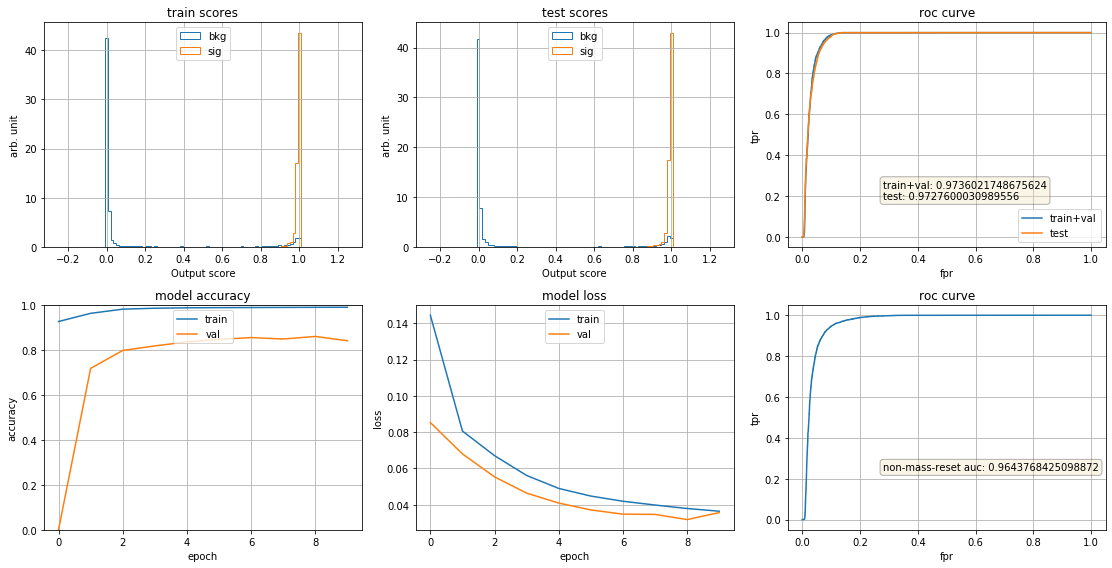

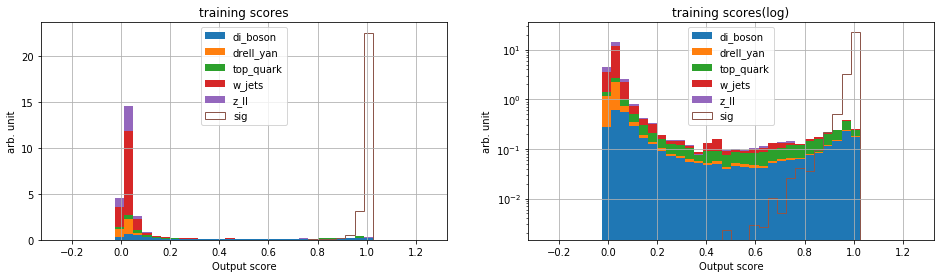

In [8]:
# Example for showing performance
model_deep.show_performance(figsize=(16, 8))
fig, ax = plt.subplots(ncols=2, figsize=(16, 4))
model_deep.plot_scores_separate(ax[0], plot_bkg_dict, plot_bkg_list, selected_features_emu,
                                sig_arr=None, sig_weights=None, plot_title='training scores',
                                bins=40, range=(-0.25, 1.25), density=True, log=False)
model_deep.plot_scores_separate(ax[1], plot_bkg_dict, plot_bkg_list, selected_features_emu,
                                sig_arr=None, sig_weights=None, plot_title='training scores',
                                bins=40, range=(-0.25, 1.25), density=True, log=True)

Training array prepared.
> signal shape: (24810, 12)
> background shape: (152506, 12)
More than one valid model file found, try to specify more infomation.
Loading the last matched model path: models/model_test_mod1016_2019-10-31_v03.h5
Model loaded.
Model performance:


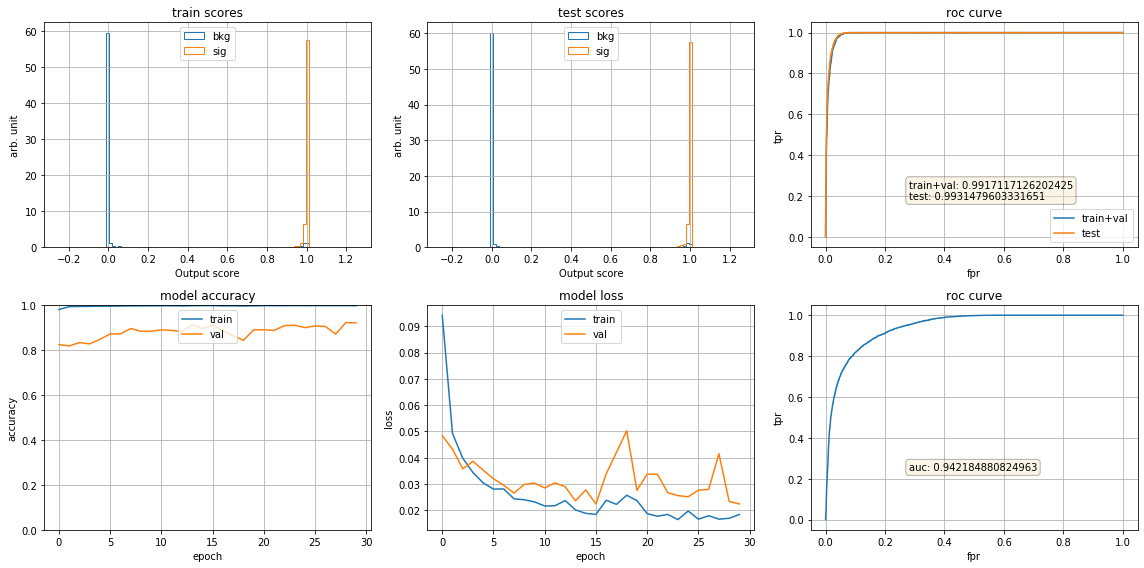

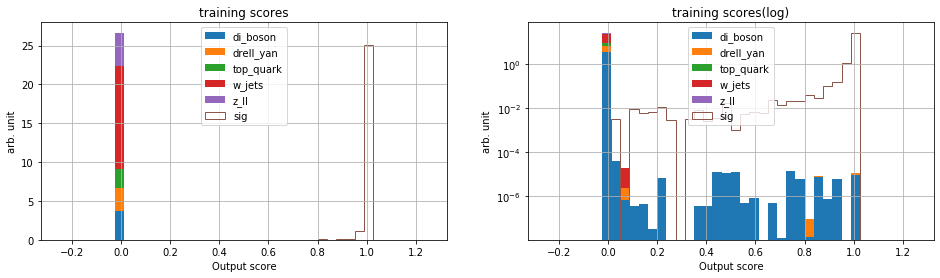

In [12]:
# Example for loading model and make plots
xs, xb = get_input_array(xs_dict_old, '500GeV', xb_dict_old, 'all', -4) # -4 for emu
model_load = model.Model_1016("model_load_test", len(selected_features_emu))
model_load.prepare_array(xs, xb, selected_features_emu, -4, sig_weight=10000, bkg_weight=10000, test_rate=0.2)
model_load.load_model('model_test', model_class='*', date='*', version='')
model_load.show_performance(figsize=(16, 8))
fig, ax = plt.subplots(ncols=2, figsize=(16, 4))
model_load.plot_scores_separate(ax[0], plot_bkg_dict, plot_bkg_list, selected_features_emu,
                                sig_arr=None, sig_weights=None, plot_title='training scores',
                                bins=40, range=(-0.25, 1.25), density=True, log=False)
model_load.plot_scores_separate(ax[1], plot_bkg_dict, plot_bkg_list, selected_features_emu,
                                sig_arr=None, sig_weights=None, plot_title='training scores',
                                bins=40, range=(-0.25, 1.25), density=True, log=True)